In [3]:
%matplotlib notebook

Converged after 260 iterations


<IPython.core.display.Javascript object>

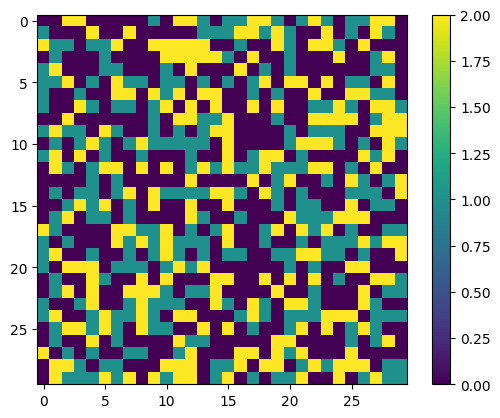

Animation saved to schelling_animation.mp4


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class SchellingModel:
    def __init__(self, grid_size, n_agents, n_types, similarity_threshold, max_iterations=5000):
        if n_agents > grid_size * grid_size:
            raise ValueError("Number of agents cannot exceed the grid size.")
        if not (0 <= similarity_threshold <= 1):
            raise ValueError("Similarity threshold must be between 0 and 1.")
        self.grid_size = grid_size
        self.n_agents = n_agents
        self.n_types = n_types
        self.similarity_threshold = similarity_threshold
        self.max_iterations = max_iterations
        self.grid = np.zeros((grid_size, grid_size), dtype=int)
        self.store = []
        self.agents = []

    def initialize_grid(self):
        positions = np.random.choice(self.grid_size * self.grid_size, self.n_agents, replace=False)
        for pos in positions:
            x, y = divmod(pos, self.grid_size)
            agent_type = np.random.randint(1, self.n_types + 1)
            self.grid[x, y] = agent_type
            self.agents.append((x, y, agent_type))

    def get_neighbors(self, x, y):
        neighbors = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                nx, ny = x + i, y + j
                if 0 <= nx < self.grid_size and 0 <= ny < self.grid_size:
                    neighbors.append(self.grid[nx, ny])
        return neighbors

    def is_satisfied(self, x, y, agent_type):
        neighbors = self.get_neighbors(x, y)
        if not neighbors:
            return True
        similar_neighbors = sum(1 for n in neighbors if n == agent_type)
        similarity_ratio = similar_neighbors / len(neighbors)
        return similarity_ratio >= self.similarity_threshold

    def move_agent(self, agent_idx):
        x, y, agent_type = self.agents[agent_idx]
        if not self.is_satisfied(x, y, agent_type):
            empty_cells = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size) if self.grid[i, j] == 0]
            if empty_cells:
                new_x, new_y = empty_cells[np.random.choice(len(empty_cells))]
                self.grid[x, y] = 0
                self.grid[new_x, new_y] = agent_type
                self.agents[agent_idx] = (new_x, new_y, agent_type)

    def run(self):
        self.initialize_grid()
        for iteration in range(self.max_iterations):
            self.store.append(self.grid.copy())
            np.random.shuffle(self.agents)
            for agent_idx in range(len(self.agents)):
                self.move_agent(agent_idx)
            if all(self.is_satisfied(x, y, agent_type) for x, y, agent_type in self.agents):
                print(f"Converged after {iteration + 1} iterations")
                break
        else:
            print(f"Reached maximum iterations ({self.max_iterations})")

    def plot_grid(self):
        plt.imshow(self.grid, cmap='viridis', interpolation='none', vmin=0, vmax=self.n_types)
        plt.colorbar()
        plt.show()

    def create_animation(self, save_path=None):
        """
        Create and display an animation of the Schelling model.
        
        Parameters:
            save_path (str, optional): Path to save the animation (e.g., 'animation.mp4' or 'animation.gif').
                                    If None, the animation will not be saved.
        """
        fig, ax = plt.subplots()
        im = ax.imshow(self.store[0], cmap='viridis', interpolation='none', vmin=0, vmax=self.n_types)
        plt.colorbar(im)

        def update(frame):
            # Update the image data
            im.set_data(self.store[frame])
            # Return a sequence of Artist objects (in this case, just the image)
            return [im]

        # Create the animation
        anim = animation.FuncAnimation(
            fig, 
            update, 
            frames=len(self.store), 
            interval=100, 
            blit=True
        )
        display (fig)
        # Display the animation
        plt.show()

        # Save the animation if a save_path is provided
        if save_path:
            try:
                # Determine the file format based on the save_path extension
                if save_path.endswith('.mp4'):
                    writer = animation.FFMpegWriter(fps=10)  # Adjust fps as needed
                    anim.save(save_path, writer=writer)
                elif save_path.endswith('.gif'):
                    writer = animation.PillowWriter(fps=10)  # Adjust fps as needed
                    anim.save(save_path, writer=writer)
                else:
                    raise ValueError("Unsupported file format. Use '.mp4' or '.gif'.")
                print(f"Animation saved to {save_path}")
            except Exception as e:
                print(f"Failed to save animation: {e}")

# Parameters
grid_size = 30
n_agents = 500
n_types = 2
similarity_threshold = 0.5

# Run the model
model = SchellingModel(grid_size, n_agents, n_types, similarity_threshold)
model.run()
model.create_animation(save_path='schelling_animation.mp4') 

Converged after 44 iterations


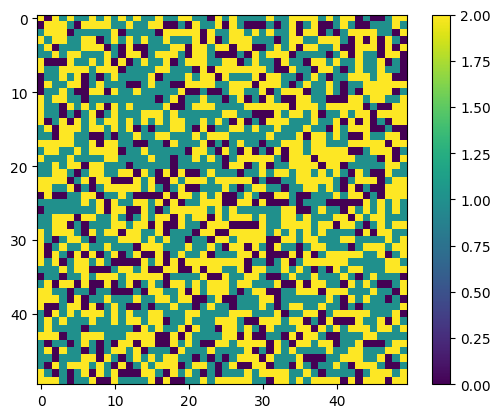

In [19]:
model = SchellingModel(grid_size=50, n_agents=2000, n_types=2, similarity_threshold=0.5)
model.run()
model.create_animation()

In [8]:
from PIL import Image
def make_gif(frames):
    frames = [Image.fromarray((image * 255).astype(np.uint8)) for image in frames]
    frame_folder = frames[0]
    frame_folder.save("my_awesome.gif", format="GIF", append_images=frames,
               save_all=True, fps = 2, loop=0)
    
make_gif (image_list)